In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.datasets as data
!pip install hdbscan
import hdbscan

dt = pd.read_excel('/content/base_de_dados_estatica_final (3).xlsx', index_col=0) #para o nome do país ficar como índice 

In [56]:
dt.head()
dt.info()
dt.columns

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, Aruba to Zimbabwe
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   %_da_população_total_vivendo_em_cidades    168 non-null    float64
 1   qtd_cidades_pop_maior_17M                  168 non-null    int64  
 2   densidade_media_cidades_pop_maior_17M      168 non-null    float64
 3   qtd_cidades_pop_entre_17M_13M              168 non-null    int64  
 4   densidade_media_cidades_pop_entre_17M_13M  168 non-null    float64
 5   qtd_cidades_pop_entre_13M_9M_AT            168 non-null    int64  
 6   densidade_media_cidades_pop_entre_13M_9M   168 non-null    float64
 7   qtd_cidades_pop_entre_9M_1M                168 non-null    int64  
 8   densidade_media_cidades_pop_entre_9M_1M    168 non-null    float64
 9   qtd_cidades_pop_entre_1M_500k              168 non-null    int64  
 10  densidade_media_cidade

Index(['%_da_população_total_vivendo_em_cidades', 'qtd_cidades_pop_maior_17M',
       'densidade_media_cidades_pop_maior_17M',
       'qtd_cidades_pop_entre_17M_13M',
       'densidade_media_cidades_pop_entre_17M_13M',
       'qtd_cidades_pop_entre_13M_9M_AT',
       'densidade_media_cidades_pop_entre_13M_9M',
       'qtd_cidades_pop_entre_9M_1M',
       'densidade_media_cidades_pop_entre_9M_1M',
       'qtd_cidades_pop_entre_1M_500k',
       'densidade_media_cidades_pop_entre_1M_500K', 'IDH_discretizado',
       'PIB_per_capita'],
      dtype='object')

In [57]:
from sklearn.preprocessing import MinMaxScaler
dtt = dt[['%_da_população_total_vivendo_em_cidades',
       'qtd_cidades_pop_maior_17M', 'densidade_media_cidades_pop_maior_17M',
       'qtd_cidades_pop_entre_17M_13M',
       'densidade_media_cidades_pop_entre_17M_13M',
       'qtd_cidades_pop_entre_13M_9M_AT',
       'densidade_media_cidades_pop_entre_13M_9M',
       'qtd_cidades_pop_entre_9M_1M',
       'densidade_media_cidades_pop_entre_9M_1M',
       'qtd_cidades_pop_entre_1M_500k',
       'densidade_media_cidades_pop_entre_1M_500K', 
       'IDH_discretizado',
       'PIB_per_capita']] #13
scaler = MinMaxScaler()
print(scaler.fit(dtt))
MinMaxScaler()
print(scaler.data_max_)
print(scaler.transform(dtt))
X = scaler.transform(dtt)

MinMaxScaler(copy=True, feature_range=(0, 1))
[1.00000000e+02 3.00000000e+00 1.70070580e+01 1.00000000e+00
 3.38780000e+01 2.00000000e+00 1.62400000e+01 8.30000000e+01
 2.53270000e+01 1.59000000e+02 2.48260000e+01 3.00000000e+00
 1.17369541e+05]
[[0.34923343 0.         0.         ... 0.         1.         0.25720918]
 [0.14413833 0.         0.         ... 0.42139289 0.         0.00385682]
 [0.61010951 0.         0.         ... 0.20788959 0.33333333 0.02846184]
 ...
 [0.6179366  0.         0.         ... 0.10902878 0.66666667 0.05346344]
 [0.35529683 0.         0.         ... 0.1885458  0.33333333 0.01255878]
 [0.21855908 0.         0.         ... 0.09417546 0.33333333 0.01350891]]


**min_sample** quanto maior o valor de você fornecer, mais conservador será o agrupamento – mais pontos serão declarados como ruído, e os clusters ficarão restritos a áreas progressivamente mais densas. 

**cluster_selection_epsilon ** selecionar um valor nos ajuda a mesclar clusters nessas regiões. Ou, em outras palavras, garante que os clusters abaixo do limiar dado não sejam mais divididos.



HDBSCAN , ou seja, DBSCAN Hierárquico, é um poderoso algoritmo de clustering baseado em densidade que é: 1) indiferente à forma dos clusters, 2) não requer o número de clusters a serem especificados, 3) robusto em relação a clusters com densidade diferente. Além disso, o HBDSCAN é muito atraente porque possui apenas um minipts hiperparâmetro, que é o número mínimo de pontos em um cluster. É relativamente rápido para grandes conjuntos de dados, detecta células periféricas e, para cada célula, reporta uma probabilidade de atribuição a um cluster . A fração de células com baixa probabilidade de atribuição a um cluster pode ser usada como uma função objetiva para otimizar os minPts, que, por sua vez, fornece o número ideal de clusters.

In [58]:
model = hdbscan.HDBSCAN(min_cluster_size=7, min_samples=3, 
                        cluster_selection_epsilon=0.1)

class_predictions = model.fit_predict(dtt)
class_predictions

array([ 1,  3,  3,  3,  0,  0,  3,  0,  0,  3,  3,  0,  3,  3,  3,  3, -1,
        3,  3,  3, -1,  3,  3,  2,  1,  3,  3,  3,  0, -1,  2,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  1,  0,  3,  3,  0,  3,  3,  3,  3,  3,  1,
       -1,  3,  0,  3,  0,  3,  0,  3,  3,  3,  3, -1,  0,  3,  2,  3,  0,
        3,  2,  3,  2,  3,  3, -1,  3,  3, -1,  0,  1,  3,  3,  0,  3,  3,
        3,  1,  1,  3,  3,  3,  3,  3,  3,  2, -1,  2, -1,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  0, -1,  3,  0,  2,
        3,  2,  3,  3,  3,  2,  1, -1,  3,  3, -1,  3,  3,  3, -1,  3,  3,
        0,  3,  3,  0,  3,  3,  3,  3, -1,  0,  3,  2,  3,  3,  3,  3,  3,
        2,  3,  3,  3,  3,  3,  2,  0,  3,  3,  3,  3,  3,  3,  3])

In [59]:
class_predictions[class_predictions == -1].size

14

In [60]:
model.labels_.max()

3

In [61]:
model.labels_.max()

3

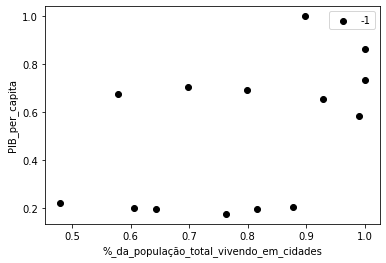

In [62]:
plt.scatter(X[class_predictions==-1,0],X[class_predictions==-1,12],c='black',label='-1')
plt.xlabel('%_da_população_total_vivendo_em_cidades') 
plt.ylabel('PIB_per_capita')
plt.legend()

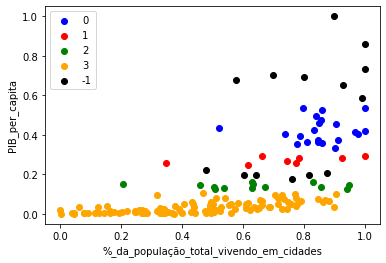

In [77]:
#%_da_população_total_vivendo_em_cidades x PIB_per_capita
plt.scatter(X[class_predictions==0,0],X[class_predictions==0,12],c='blue', label='0')
plt.scatter(X[class_predictions==1,0],X[class_predictions==1,12],c='red',label='1')
plt.scatter(X[class_predictions==2,0],X[class_predictions==2,12],c='green', label='2')
plt.scatter(X[class_predictions==3,0],X[class_predictions==3,12],c='orange',label='3')
plt.scatter(X[class_predictions==-1,0],X[class_predictions==-1,12],c='black', label='-1')
plt.xlabel ('%_da_população_total_vivendo_em_cidades') 
plt.ylabel ('PIB_per_capita')
plt.legend()

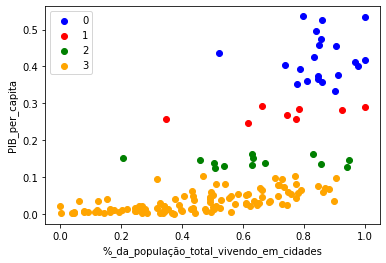

In [76]:
#%_da_população_total_vivendo_em_cidades x PIB_per_capita
plt.scatter(X[class_predictions==0,0],X[class_predictions==0,12],c='blue', label='0')
plt.scatter(X[class_predictions==1,0],X[class_predictions==1,12],c='red',label='1')
plt.scatter(X[class_predictions==2,0],X[class_predictions==2,12],c='green', label='2')
plt.scatter(X[class_predictions==3,0],X[class_predictions==3,12],c='orange',label='3')
plt.xlabel ('%_da_população_total_vivendo_em_cidades') 
plt.ylabel ('PIB_per_capita')
plt.legend()

In [64]:
dtt[model.labels_==2].sum

<bound method DataFrame.sum of                      %_da_população_total_vivendo_em_cidades  ...  PIB_per_capita
país                                                          ...                
Barbados                                              31.158  ...    17745.867810
Chile                                                 87.643  ...    15923.358738
Guam                                                  94.859  ...    15000.000000
Croatia                                               57.242  ...    14674.023127
Hungary                                               71.644  ...    16264.015353
Lithuania                                             67.855  ...    19082.517761
Latvia                                                68.222  ...    17851.580119
Oman                                                  85.443  ...    19072.779582
Panama                                                68.059  ...    15575.082785
Poland                                                60.037  ...  

In [65]:
dtt[model.labels_==3].sum

<bound method DataFrame.sum of               %_da_população_total_vivendo_em_cidades  ...  PIB_per_capita
país                                                   ...                
Afghanistan                                    25.754  ...      551.865029
Angola                                         66.177  ...     3437.295458
Albania                                        61.229  ...     5223.809213
Argentina                                      91.991  ...    11687.597997
Azerbaijan                                     56.031  ...     4717.719834
...                                               ...  ...             ...
Vietnam                                        36.628  ...     2563.175868
Yemen                                          37.273  ...      935.888143
South Africa                                   66.856  ...     6369.231608
Zambia                                         44.072  ...     1572.344032
Zimbabwe                                       32.210  ...     1683.7

In [66]:
dtt[model.labels_==0].sum

<bound method DataFrame.sum of                       %_da_população_total_vivendo_em_cidades  ...  PIB_per_capita
país                                                           ...                
Andorra                                                87.984  ...    42051.595407
United Arab Emirates                                   86.789  ...    43004.953358
Australia                                              86.124  ...    58392.709121
Austria                                                58.515  ...    51230.275299
Belgium                                                98.041  ...    47292.967110
Canada                                                 81.482  ...    46192.375140
Germany                                                77.376  ...    47513.702098
Denmark                                                87.994  ...    61833.713461
Finland                                                85.446  ...    50135.720665
France                                                 8

In [67]:
dtt[model.labels_==1].sum

<bound method DataFrame.sum of              %_da_população_total_vivendo_em_cidades  ...  PIB_per_capita
país                                                  ...                
Aruba                                         43.546  ...    30262.487230
Brunei                                        77.942  ...    31627.233053
Cyprus                                        66.805  ...    28967.576681
Spain                                         80.565  ...    30405.833051
Italy                                         70.736  ...    34388.512659
South Korea                                   81.430  ...    33621.879521
Kuwait                                       100.000  ...    34248.841679
Puerto Rico                                   93.576  ...    33271.164984

[8 rows x 13 columns]>

In [68]:
dtt[model.labels_==-1].sum

<bound method DataFrame.sum of               %_da_população_total_vivendo_em_cidades  ...  PIB_per_capita
país                                                   ...                
Bahrain                                        89.394  ...    24133.549307
Bermuda                                       100.000  ...   101207.852636
Switzerland                                    73.849  ...    82708.514386
Estonia                                        69.051  ...    23241.888548
Greece                                         79.388  ...    20731.204281
Ireland                                        63.405  ...    79414.604519
Iceland                                        93.855  ...    76867.298790
Luxembourg                                     91.223  ...   117369.540527
Macao                                         100.000  ...    86355.328312
Norway                                         82.616  ...    81335.651215
Portugal                                       65.764  ...    23477.7

ANÁLISE DE SILHUETA A pontuação é maior quando os clusters são densos e bem separados, o que se relaciona com um conceito padrão de um cluster


In [79]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
#X, y = dt

In [149]:
model = hdbscan.HDBSCAN(min_cluster_size=7, min_samples=4, 
                        cluster_selection_epsilon=0.3).fit(X)
labels = model.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.25668471249611796

Índice Calinski-Harabasz A pontuação é maior quando os clusters são densos e bem separados, o que se relaciona com um conceito padrão de um cluster.

In [150]:
import numpy as np
model = hdbscan.HDBSCAN(min_cluster_size=7, min_samples=4, 
                        cluster_selection_epsilon=0.3).fit(X)
labels = model.labels_
metrics.calinski_harabasz_score(X, labels)

40.9229405219253

Índice Davies-Bouldin Values closer to zero indicate a better partition.

In [151]:
from sklearn.metrics import davies_bouldin_score
model = hdbscan.HDBSCAN(min_cluster_size=7, min_samples=4, 
                        cluster_selection_epsilon=0.3).fit(X)
labels = model.labels_
davies_bouldin_score(X, labels)

2.0480711540129817